In [9]:
# Data Processing
import pandas as pd
import numpy as np

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv("DATASET2.csv")
df

,X (Latitude),Y (Longitude),District_Name,Name_of_Police_Station,NH/ SH/ Other Road,Location,Starting From (KM),Ending (KM),No. of Accident,No. of Fatalities
0,18.504207,73.921399,Pune City,Hadapsar,NH-65,Vaidyawadi Chowk,00 mtr.,500 mtr.,15,3
1,18.475402,73.958490,Pune City,Hadapsar,NH-65,Fursungi Fata,00 mtr.,500 mtr.,9,4
2,18.466391,73.978883,Pune City,Hadapsar,NH-965,"Fursungi Railway Bridge,Saswad Road",00 mtr.,500 mtr.,11,5
3,18.513016,73.933366,Pune City,Hadapsar,NH-04,IBM Company Saswad Road,00 mtr.,500 mtr.,7,1
4,18.433087,73.838014,Pune City,Bharti Vidhyapith Road,NH-04,Dari Pull,00 mtr.,500 mtr.,11,8
5,18.485432,73.799690,Pune City,Warje,NH-04,Mai Mangeshkar Hospital,100 mtr.,500 mtr.,14,12
6,18.475023,73.809431,Pune City,Warje,NH-04,Mutha River Bridge,50 mtr,100 mtr.,7,7
7,18.503095,73.792889,Pune City,Warje,NH-04,Dukkar Khind,100 mtr.,500 mtr.,9,5
8,18.461084,73.822208,Pune City,Sinhgadh,NH-04,Navale Bridge,00 mtr.,500 mtr.,30,17
9,18.448896,73.833281,Pune City,Sinhgadh,NH-04,Bhumkar Pull,00 mtr.,500 mtr.,15,9


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


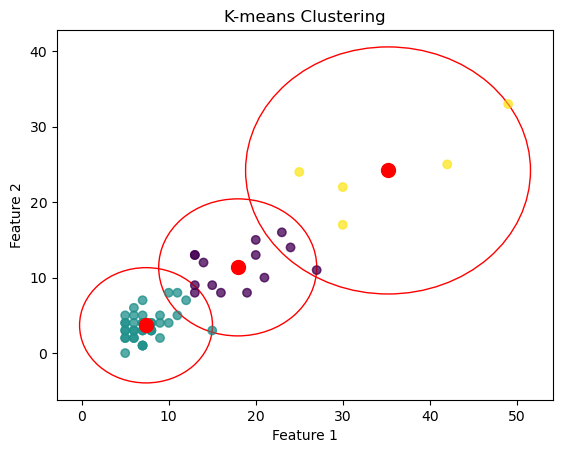

In [63]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have your data loaded into a numpy array
# Extract the features
feature1 = df['No. of Accident']
feature2 = df[ 'No. of Fatalities']

# Combine the features into a single array
features = np.column_stack((feature1, feature2))

# Specify the number of clusters
num_clusters = 3

# Instantiate KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
labels = kmeans.labels_

cluster_radii = []
for i in range(num_clusters):
    distances = np.linalg.norm(features[labels == i] - cluster_centers[i], axis=1)
    max_distance = np.max(distances)
    cluster_radii.append(max_distance)

# Visualize the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5)
for i in range(num_clusters):
    circle = Circle(cluster_centers[i], cluster_radii[i], color='red', fill=False)
    plt.gca().add_patch(circle)
# Visualize the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


In [65]:
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['cluster'] = labels

# Separate DataFrames for each cluster
cluster_dataframes = []
for cluster_id in range(3):
    cluster_df = df[df['cluster'] == cluster_id].copy()
    cluster_dataframes.append(cluster_df)

# Example of accessing the first cluster DataFrame
print("Cluster 1 DataFrame:")
print(cluster_dataframes[0])

Cluster 1 DataFrame:
    X (Latitude)  Y (Longitude)     District_Name Name_of_Police_Station  \
5      18.485432      73.799690         Pune City                  Warje   
9      18.448896      73.833281         Pune City               Sinhgadh   
10     18.448063      73.858501         Pune City      Bharti Vidhyapith   
18     18.687432      73.720028  Pimpri Chinchwad           DehuRoad P.S   
19     18.711498      73.700100  Pimpri Chinchwad           DehuRoad P.S   
23     18.715204      73.848283  Pimpri Chinchwad             Chakan P.S   
24     18.755790      73.859180  Pimpri Chinchwad             Chakan P.S   
25     19.123346      73.976404        Pune Rural            Narayangaon   
26     19.191807      74.105815        Pune Rural            Narayangaon   
27     19.144747      74.026903        Pune Rural            Narayangaon   
28     18.754523      73.674271        Pune Rural               Vadmaval   
33     18.542080      74.024890        Pune Rural                  

In [66]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the centroid values
print("Centroid Values:")
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+0}: {centroid}")

Centroid Values:
Cluster 0: [17.92857143 11.35714286]
Cluster 1: [7.39473684 3.68421053]
Cluster 2: [35.2 24.2]


In [67]:
df.loc[df['cluster'] ==0, 'Accident Severity'] =2
df.loc[(df['cluster'] ==1), 'Accident Severity'] = 1
df.loc[df['cluster'] ==2, 'Accident Severity'] = 3


In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have performed KMeans clustering and obtained cluster labels
# labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(features, labels)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(features, labels)

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.6029920888390403
Davies-Bouldin Index: 0.6408021261619875


In [69]:
df

,X (Latitude),Y (Longitude),District_Name,Name_of_Police_Station,NH/ SH/ Other Road,Location,Starting From (KM),Ending (KM),No. of Accident,No. of Fatalities,cluster,Accident Severity
0,18.504207,73.921399,Pune City,Hadapsar,NH-65,Vaidyawadi Chowk,00 mtr.,500 mtr.,15,3,1,1.0
1,18.475402,73.958490,Pune City,Hadapsar,NH-65,Fursungi Fata,00 mtr.,500 mtr.,9,4,1,1.0
2,18.466391,73.978883,Pune City,Hadapsar,NH-965,"Fursungi Railway Bridge,Saswad Road",00 mtr.,500 mtr.,11,5,1,1.0
3,18.513016,73.933366,Pune City,Hadapsar,NH-04,IBM Company Saswad Road,00 mtr.,500 mtr.,7,1,1,1.0
4,18.433087,73.838014,Pune City,Bharti Vidhyapith Road,NH-04,Dari Pull,00 mtr.,500 mtr.,11,8,1,1.0
5,18.485432,73.799690,Pune City,Warje,NH-04,Mai Mangeshkar Hospital,100 mtr.,500 mtr.,14,12,0,2.0
6,18.475023,73.809431,Pune City,Warje,NH-04,Mutha River Bridge,50 mtr,100 mtr.,7,7,1,1.0
7,18.503095,73.792889,Pune City,Warje,NH-04,Dukkar Khind,100 mtr.,500 mtr.,9,5,1,1.0
8,18.461084,73.822208,Pune City,Sinhgadh,NH-04,Navale Bridge,00 mtr.,500 mtr.,30,17,2,3.0
9,18.448896,73.833281,Pune City,Sinhgadh,NH-04,Bhumkar Pull,00 mtr.,500 mtr.,15,9,0,2.0


In [71]:
df.to_csv('Kmeans.csv', index=False)